# 데이터 로드, 가공, 정제

In [156]:
import pandas as pd
import numpy as np

df = pd.read_csv('지하철.csv')

df.drop(['작업일자'], axis=1, inplace=True)
df['지하철역'] = df['지하철역'].str.strip()
df['지하철역']

0              동대문
1              동묘앞
2              서울역
3               시청
4              신설동
           ...    
61930         양천향교
61931          여의도
61932           염창
61933           증미
61934    흑석(중앙대입구)
Name: 지하철역, Length: 61935, dtype: object

In [157]:
import pandas as pd
import numpy as np

df = pd.read_csv('지하철.csv')

info = df.iloc[:,:3]
info.columns = ['년월','호선','역명']
info.head()



,년월,호선,역명
0,202310,1호선,동대문
1,202310,1호선,동묘앞
2,202310,1호선,서울역
3,202310,1호선,시청
4,202310,1호선,신설동


In [158]:
import pandas as pd
import numpy as np

# 승차
riding = df.iloc[:, 3:]
riding = riding.iloc[:,[0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44,46]]
riding.rename(columns={'04시-05시 승차인원':'4시', '05시-06시 승차인원':'5시', '06시-07시 승차인원':'6시','07시-08시 승차인원':'7시',
                       '08시-09시 승차인원':'8시','09시-10시 승차인원':'9시','10시-11시 승차인원':'10시','11시-12시 승차인원':'11시',
                       '12시-13시 승차인원':'12시','13시-14시 승차인원':'13시','14시-15시 승차인원':'14시','15시-16시 승차인원':'15시',
                      '16시-17시 승차인원':'16시','17시-18시 승차인원':'17시','18시-19시 승차인원':'18시','19시-20시 승차인원':'19시',
                      '20시-21시 승차인원':'20시','21시-22시 승차인원':'21시','22시-23시 승차인원':'22시','23시-24시 승차인원':'23시',
                      '00시-01시 승차인원':'24시','01시-02시 승차인원':'1시','02시-03시 승차인원':'2시','03시-04시 승차인원':'3시'}, inplace=True)
riding = pd.concat([info, riding], axis=1)
riding.head()

,년월,호선,역명,4시,5시,6시,7시,8시,9시,10시,...,18시,19시,20시,21시,22시,23시,24시,1시,2시,3시
0,202310,1호선,동대문,688,11493,9618,14951,20657,19909,18030,...,25680,17817,15062,13799,10430,4866,555,1,0,0
1,202310,1호선,동묘앞,208,3065,3652,7542,12370,11293,13116,...,24843,10039,5844,4793,3530,1141,85,1,0,0
2,202310,1호선,서울역,700,8826,13369,42194,75501,70759,67566,...,220828,123025,89108,87580,59608,29305,2333,2,0,0
3,202310,1호선,시청,60,2408,4325,8093,11102,14674,17236,...,158616,69239,62691,53963,32319,10655,323,0,0,0
4,202310,1호선,신설동,388,9245,9988,21304,31140,22327,19391,...,49687,20869,13794,12004,8113,3693,289,0,0,0


In [159]:
# 하차
stopover = df.iloc[:, 3:]
stopover = stopover.iloc[:,[1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47]]
stopover.rename(columns={'04시-05시 하차인원':'4시', '05시-06시 하차인원':'5시', '06시-07시 하차인원':'6시','07시-08시 하차인원':'7시',
                       '08시-09시 하차인원':'8시','09시-10시 하차인원':'9시','10시-11시 하차인원':'10시','11시-12시 하차인원':'11시',
                       '12시-13시 하차인원':'12시','13시-14시 하차인원':'13시','14시-15시 하차인원':'14시','15시-16시 하차인원':'15시',
                      '16시-17시 하차인원':'16시','17시-18시 하차인원':'17시','18시-19시 하차인원':'18시','19시-20시 하차인원':'19시',
                      '20시-21시 하차인원':'20시','21시-22시 하차인원':'21시','22시-23시 하차인원':'22시','23시-24시 하차인원':'23시',
                      '00시-01시 하차인원':'24시','01시-02시 하차인원':'1시','02시-03시 하차인원':'2시','03시-04시 하차인원':'3시'}, inplace=True)
stopover = pd.concat([info, stopover], axis=1)
stopover.head()

,년월,호선,역명,4시,5시,6시,7시,8시,9시,10시,...,18시,19시,20시,21시,22시,23시,24시,1시,2시,3시
0,202310,1호선,동대문,23,2221,6755,12017,20541,23460,26158,...,22333,21418,14927,13295,12184,9061,2415,221,0,0
1,202310,1호선,동묘앞,1,1120,4528,9281,21560,18828,25633,...,11845,8575,6512,6467,7088,4288,1680,318,0,0
2,202310,1호선,서울역,16,9093,60044,111515,226340,157304,85381,...,95463,66792,48809,44886,29468,14003,2475,184,0,0
3,202310,1호선,시청,1,5020,26689,70011,186809,91258,53117,...,29295,14841,9941,8943,6830,4416,855,12,0,0
4,202310,1호선,신설동,18,2315,8178,22493,52860,32651,22218,...,30045,22603,15561,15576,13190,9543,2263,0,0,0


# 데이터 가공, 정제 (데이터 프레임 조작)

In [160]:
import pandas as pd
import numpy as np

# 승하차 인원 합계
riding['합계'] = riding.sum(axis=1)
stopover['합계'] = stopover.sum(axis=1)
riding.head()

<ipython-input-160-e2c59ffff123>:5: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

<ipython-input-160-e2c59ffff123>:6: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



,년월,호선,역명,4시,5시,6시,7시,8시,9시,10시,...,19시,20시,21시,22시,23시,24시,1시,2시,3시,합계
0,202310,1호선,동대문,688,11493,9618,14951,20657,19909,18030,...,17817,15062,13799,10430,4866,555,1,0,0,576351
1,202310,1호선,동묘앞,208,3065,3652,7542,12370,11293,13116,...,10039,5844,4793,3530,1141,85,1,0,0,540024
2,202310,1호선,서울역,700,8826,13369,42194,75501,70759,67566,...,123025,89108,87580,59608,29305,2333,2,0,0,1845268
3,202310,1호선,시청,60,2408,4325,8093,11102,14674,17236,...,69239,62691,53963,32319,10655,323,0,0,0,993198
4,202310,1호선,신설동,388,9245,9988,21304,31140,22327,19391,...,20869,13794,12004,8113,3693,289,0,0,0,613871


In [161]:
import pandas as pd
import numpy as np

# 승차
df_r = riding[['년월', '호선', '역명', '합계']]
df_r.head()

,년월,호선,역명,합계
0,202310,1호선,동대문,576351
1,202310,1호선,동묘앞,540024
2,202310,1호선,서울역,1845268
3,202310,1호선,시청,993198
4,202310,1호선,신설동,613871


In [162]:
import pandas as pd
import numpy as np

# 하차
df_s = stopover[['년월', '호선', '역명', '합계']]
df_s.head()



,년월,호선,역명,합계
0,202310,1호선,동대문,571007
1,202310,1호선,동묘앞,552975
2,202310,1호선,서울역,1748897
3,202310,1호선,시청,1000474
4,202310,1호선,신설동,600294


In [163]:
import pandas as pd
import numpy as np

# 평균으로 일일 이용객 합계
# 승차
dfg_r = df_r.groupby(['년월','호선','역명'])['합계'].mean()
dfg_r.head()

년월      호선   역명 
201501  1호선  동대문     685290.0
             동묘앞     487051.0
             서울역    2362117.0
             시청      950070.0
             신설동     714195.0
Name: 합계, dtype: float64

In [164]:
import pandas as pd
import numpy as np

# 평균으로 일일 이용객 합계
# 하차
dfg_s = df_s.groupby(['년월','호선','역명'])['합계'].mean()
dfg_s.head()

년월      호선   역명 
201501  1호선  동대문     744000.0
             동묘앞     502159.0
             서울역    2118269.0
             시청      944482.0
             신설동     696821.0
Name: 합계, dtype: float64

In [165]:
import pandas as pd
import numpy as np

# 데이터프레임 수정
# 승차
dfg2_r = pd.DataFrame(dfg_r)
dfg2_r = dfg2_r.reset_index()
dfg2_r.head()



,년월,호선,역명,합계
0,201501,1호선,동대문,685290.0
1,201501,1호선,동묘앞,487051.0
2,201501,1호선,서울역,2362117.0
3,201501,1호선,시청,950070.0
4,201501,1호선,신설동,714195.0


In [166]:
import pandas as pd
import numpy as np

# 데이터프레임 수정
# 하차
dfg2_s = pd.DataFrame(dfg_s)
dfg2_s = dfg2_s.reset_index()
dfg2_s.head()



,년월,호선,역명,합계
0,201501,1호선,동대문,744000.0
1,201501,1호선,동묘앞,502159.0
2,201501,1호선,서울역,2118269.0
3,201501,1호선,시청,944482.0
4,201501,1호선,신설동,696821.0


In [167]:
import pandas as pd
import numpy as np

# 합계 -> 이용객수
dfg2_r.columns = ['년월', '호선', '역명', '이용객수']
dfg2_s.columns = ['년월', '호선', '역명', '이용객수']
dfg2_r.head()

,년월,호선,역명,이용객수
0,201501,1호선,동대문,685290.0
1,201501,1호선,동묘앞,487051.0
2,201501,1호선,서울역,2362117.0
3,201501,1호선,시청,950070.0
4,201501,1호선,신설동,714195.0


In [168]:
import pandas as pd
import numpy as np

# 승하차 평균값으로 일일 평균 이용객 수 구하기
dfg3_r = pd.DataFrame(round(dfg2_r.groupby(['호선', '역명'])['이용객수'].mean()))
dfg3_s = pd.DataFrame(round(dfg2_s.groupby(['호선', '역명'])['이용객수'].mean()))
dfg3_r.head()

이용객수
호선  역명            
1호선 동대문   606983.0
    동묘앞   492963.0
    서울역  1743191.0
    시청    888967.0
    신설동   639310.0

In [169]:
import pandas as pd
import numpy as np

# 이용객수로 정렬
dfg3_r = dfg3_r.sort_values(by='이용객수', ascending=False)
dfg3_s = dfg3_s.sort_values(by='이용객수', ascending=False)
dfg3_s.head(10)

이용객수
호선  역명                 
2호선 강남        2875353.0
    잠실        2533679.0
    잠실(송파구청)  2397873.0
    홍대입구      2382842.0
    신림        2089778.0
    삼성        2005753.0
    구로디지털단지   1944358.0
    신도림       1818558.0
    서울대입구     1789032.0
    삼성(무역센터)  1766953.0

In [170]:
import pandas as pd
import numpy as np

# 인덱스 리빌드
dfg4_r = pd.DataFrame(dfg3_r)
dfg4_r = dfg4_r.reset_index()
#dfg4_r.head()

dfg4_s = pd.DataFrame(dfg3_s)
dfg4_s = dfg4_s.reset_index()
dfg4_s.head()

,호선,역명,이용객수
0,2호선,강남,2875353.0
1,2호선,잠실,2533679.0
2,2호선,잠실(송파구청),2397873.0
3,2호선,홍대입구,2382842.0
4,2호선,신림,2089778.0


# 데이터 가공, 정제 (데이터 결합)

In [171]:
import pandas as pd
import numpy as np

dinfo = pd.read_csv('map_utf.csv')

dinfo.columns = ['역명', '호선', '위도', '경도']
dinfo.head()

,역명,호선,위도,경도
0,종로3가,1,37.571607,126.991806
1,동대문,1,37.571420,127.009745
2,서울,1,37.554648,126.972559
3,신도림,1,37.508725,126.891295
4,시청,1,37.564718,126.977108


In [172]:
import pandas as pd
import numpy as np

dinfo['역명'] = dinfo['역명'].str.strip()
dinfo['역명'] = dinfo['역명'].str.replace(" ", "")

dfg4_r['호선'].unique()

# 1~9 호선 까지만 분리.
dfg4_r = dfg4_r[dfg4_r['호선'].isin(['1호선', '2호선', '3호선', '4호선', '5호선', '6호선', '7호선', '8호선', '9호선'])]
dfg4_s = dfg4_s[dfg4_s['호선'].isin(['1호선', '2호선', '3호선', '4호선', '5호선', '6호선', '7호선', '8호선', '9호선'])]

dfg4_r.loc[dfg4_r['호선']=='1호선', '호선'] = 1
dfg4_r.loc[dfg4_r['호선']=='2호선', '호선'] = 2
dfg4_r.loc[dfg4_r['호선']=='3호선', '호선'] = 3
dfg4_r.loc[dfg4_r['호선']=='4호선', '호선'] = 4
dfg4_r.loc[dfg4_r['호선']=='5호선', '호선'] = 5
dfg4_r.loc[dfg4_r['호선']=='6호선', '호선'] = 6
dfg4_r.loc[dfg4_r['호선']=='7호선', '호선'] = 7
dfg4_r.loc[dfg4_r['호선']=='8호선', '호선'] = 8
dfg4_r.loc[dfg4_r['호선']=='9호선', '호선'] = 9

dfg4_s.loc[dfg4_s['호선']=='1호선', '호선'] = 1
dfg4_s.loc[dfg4_s['호선']=='2호선', '호선'] = 2
dfg4_s.loc[dfg4_s['호선']=='3호선', '호선'] = 3
dfg4_s.loc[dfg4_s['호선']=='4호선', '호선'] = 4
dfg4_s.loc[dfg4_s['호선']=='5호선', '호선'] = 5
dfg4_s.loc[dfg4_s['호선']=='6호선', '호선'] = 6
dfg4_s.loc[dfg4_s['호선']=='7호선', '호선'] = 7
dfg4_s.loc[dfg4_s['호선']=='8호선', '호선'] = 8
dfg4_s.loc[dfg4_s['호선']=='9호선', '호선'] = 9

# 역정보와 이용객수 병합
# 승차
df_m_r = pd.merge(dfg4_r, dinfo, how='inner')
#df_m_r.head()
# 하차
df_m_s = pd.merge(dfg4_s, dinfo, how='inner')
df_m_s.head()


,호선,역명,이용객수,위도,경도
0,2,강남,2875353.0,37.497175,127.027926
1,2,강남,2875353.0,37.497175,127.027926
2,2,잠실,2533679.0,37.513950,127.102234
3,2,잠실,2533679.0,37.513950,127.102234
4,2,홍대입구,2382842.0,37.557192,126.925381


In [173]:
import pandas as pd
import numpy as np

# 중복제거
df_m_r_2 = df_m_r.drop_duplicates('이용객수', keep='first')
df_m_s_2 = df_m_s.drop_duplicates('이용객수', keep='first')

# 상위, 하위 30개 역 표시
# 승차
dfm_top_r = df_m_r_2.head(30)
dfm_bottom_r = df_m_r_2.tail(30)

# 하차
dfm_top_s = df_m_s_2.head(30)
dfm_bottom_s = df_m_s_2.tail(30)

dfm_bottom_s.head()

,호선,역명,이용객수,위도,경도
366,9,노들,317694.0,37.512887,126.953222
367,6,청구,315471.0,37.560245,127.013828
369,5,신길,313906.0,37.517122,126.917169
371,2,신설동,311327.0,37.575297,127.025087
374,5,청구,309055.0,37.560245,127.013828


# 한글폰트 설치

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm

!apt-get -qq -y install fonts-nanum > /dev/null
#fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

#font = fm.FontProperties(fname=fontpath, size=9)

#fm._rebuild()



fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설치


In [175]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설치

# 데이터 시각화 (지도)

In [176]:
# 지도시각화
import folium

# 승차 상위 이용객 30개역 표시
map1 = folium.Map(location=[37.5502, 126.982], zoom_start=11)

for item in dfm_top_r.index:
    lat = dfm_top_r.loc[item, '위도']
    long = dfm_top_r.loc[item, '경도']
    folium.CircleMarker([lat,long],
                                   radius=dfm_top_r.loc[item, '이용객수']/70000,
                                   color='green',
                                    fill = True).add_to(map1)
map1


In [177]:
# 승차 하위 이용객 30개역 표시
map2 = folium.Map(location=[37.5502, 126.982], zoom_start=11)

for item in dfm_bottom_r.index:
    lat = dfm_bottom_r.loc[item, '위도']
    long = dfm_bottom_r.loc[item, '경도']
    folium.CircleMarker([lat,long],
                                   radius=dfm_bottom_r.loc[item, '이용객수']/20000,
                                   color='green',
                                    fill = True).add_to(map2)

map2

In [178]:
# 하차 상위 이용객 30개역 표시
map3 = folium.Map(location=[37.5502, 126.982], zoom_start=11)

for item in dfm_top_s.index:
    lat = dfm_top_s.loc[item, '위도']
    long = dfm_top_s.loc[item, '경도']
    folium.CircleMarker([lat,long],
                                   radius=dfm_top_s.loc[item, '이용객수']/70000,
                                   color='green',
                                    fill = True).add_to(map3)

map3

In [179]:
# 하차 하위 이용객 30개역 표시
map4 = folium.Map(location=[37.5502, 126.982], zoom_start=11)

for item in dfm_bottom_s.index:
    lat = dfm_bottom_s.loc[item, '위도']
    long = dfm_bottom_s.loc[item, '경도']
    folium.CircleMarker([lat,long],
                                   radius=dfm_bottom_s.loc[item, '이용객수']/20000,
                                   color='green',
                                    fill = True).add_to(map4)

map4

# 데이터 시각화 (차트)

<Axes: xlabel='호선', ylabel='count'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 54840 (\N{HANGUL SYLLABLE HO}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 54840 (\N{HANGUL SYLLABLE HO}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from current font.



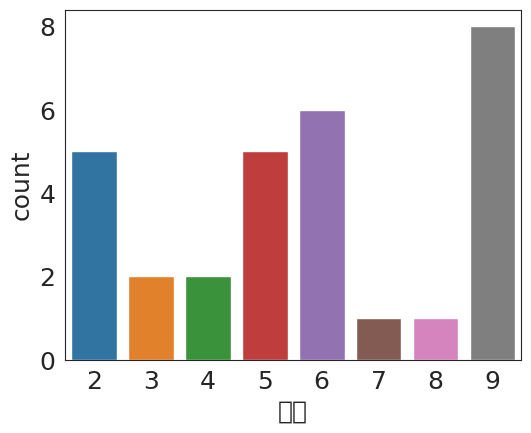

In [180]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('white')
#tips=sns.load_dataset("tips")
#df=pd.DataFrame(tips)
#print(df.head())

fig=plt.figure(figsize=(20,10))
#ax1=fig.add_subplot(2,3,1)
#ax2=fig.add_subplot(2,3,2)
ax3=fig.add_subplot(2,3,3)
#sns.barplot(data=df,x='day',y='total_bill', ax=ax1)
#sns.scatterplot(data=df,x='total_bill',y='tip',ax=ax2, hue='day')
sns.countplot(data=dfm_bottom_s,x='호선',ax=ax3)

In [181]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# 호선별 승차 이용객수 (상위30)
fig=px.bar(dfm_top_r, x='호선', y='이용객수',
color='호선',
color_continuous_scale=px.colors.diverging.Spectral)
fig.update_layout(width=900)
fig.write_html('/content/d.html')
fig.show()

In [182]:
# 호선별 승차 이용객수 (하위30)
fig=px.bar(dfm_bottom_r, x='호선', y='이용객수',
color='호선',
color_continuous_scale=px.colors.diverging.Spectral)
fig.update_layout(width=900)
fig.show()

In [183]:
# 호선별 하차 이용객수 (상위30)
fig=px.bar(dfm_top_s, x='호선', y='이용객수',
color='호선',
color_continuous_scale=px.colors.diverging.Spectral)
fig.update_layout(width=900)
fig.show()

In [184]:
# 호선별 하차 이용객수 (하위30)
fig=px.bar(dfm_bottom_s, x='호선', y='이용객수',
color='호선',
color_continuous_scale=px.colors.diverging.Spectral)
fig.update_layout(width=900)
fig.show()

In [185]:
# 역별 승차 이용객수 (상위30)
fig=px.bar(dfm_top_r, x='역명', y='이용객수',
color='역명',
color_continuous_scale=px.colors.diverging.Spectral)
fig.update_layout(width=900)
fig.show()

In [186]:
# 역별 승차 이용객수 (하위30)
fig=px.bar(dfm_bottom_r, x='역명', y='이용객수',
color='역명',
color_continuous_scale=px.colors.diverging.Spectral)
fig.update_layout(width=900)
fig.show()

In [187]:
# 역별 하차 이용객수 (상위30)
fig=px.bar(dfm_top_s, x='역명', y='이용객수',
color='역명',
color_continuous_scale=px.colors.diverging.Spectral)
fig.update_layout(width=900)
fig.show()

In [188]:
# 역별 하차 이용객수 (하위30)
fig=px.bar(dfm_bottom_s, x='역명', y='이용객수',
color='역명',
color_continuous_scale=px.colors.diverging.Spectral)
fig.update_layout(width=900)
fig.show()